#### Perceptron Binary Classifier
$$\boldsymbol{w} = \begin{bmatrix}
\\ w_{1}
\\ .
\\ .
\\ .
\\ w_{m}
\end{bmatrix} ,
\boldsymbol{x} = \begin{bmatrix}
\\ x_{1}
\\ .
\\ .
\\ .
\\ x_{m}
\end{bmatrix}$$


$$z = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + \cdot \cdot \cdot + w_{m}x_{m} 
  = \sum_{j=0}^{m} \mathbf{w}_{j}\mathbf{x}_{j} = \mathbf{w}^{T}\mathbf{x}$$
  
**The activation Function**

In the perceptron algorithm, the activation is **unit step function** (**Heaviside step function**)
$$\phi(z) = \left\{\begin{matrix} 
1\quad  if\ z\geq \Theta 
\\
-1\quad otherwise
\end{matrix}\right.$$

- Takes a linear combination of input values **X**
- and a corresponding weight vector **w**
- z is the net input

If the activation of a particular sample $$x^{(i)}$$ is greater than a defined threshold $$\theta$$, we predict class 1 and class -1

  ![alt text](perceptronClass.JPG "Perceptron Classification")
  
  ![alt text](perceptron.JPG "Perceptron Algorithm")



In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Implementing a perceptron learning algorithm

In [3]:
class Perceptron(object):
    """Perceptron Classifier.
        Parameters
        ================
        eta: float -> Learning rate(between 0.0 and 1.0)
        n_iter: int -> iterations over the training dataset.

        Attributes
        ============
        W : 1-d array (vector) -> Weights after fitting
        errors : list -> Number of misclassifications in every epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ===========
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
            
        y : array-like, shape = {n_samples}
            Target values
            
        Returns
        =========
        self: object
        
        """
        
        self.w = np.zeros(1 + X.shape[1])
        self.errors = []
        
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                error += int(update != 0.0)
                
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w[1:] + self.w[0])
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Training a perceptron model on the Iris dataset
- Load two flower classes **Setosa** and **Versicolor** from the Iris dataset.
- Consider two features **sepal length** and **petal length**

- Use Pandas library to load the Iris dataset directly from the UCI machine learning Repo into a **DataFrame** object
- Print the last five lines via the **tail** method

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [6]:
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

- Extract the first 100 class labels that corresponds to the 50 Iris-Setosa and 50 Iris-Versicolor flowers
- Convert the class labels into two integer class labels 1(Versicolor) and -1(Setosa)
- Extract the first feature column (sepal length) and the third feature column (petal length)
- Assign them to a feature matrix X
- Visualize via a two dimensional scatter plot

In [7]:
y = df.iloc[0:100, 4].values

In [8]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [9]:
X = df.iloc[0:100, [0, 2]].values

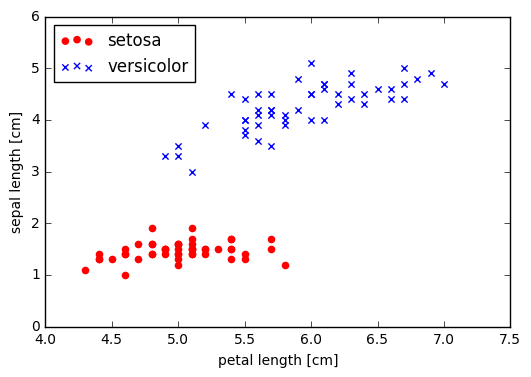

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()

- Train our perceptron algorithm
- plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

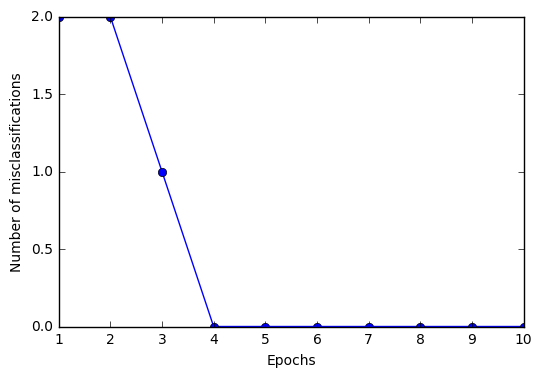

In [12]:
plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

**A convenience function to visualize the decision boundaries for 2D datasets**

In [13]:
from matplotlib.colors import ListedColormap

In [14]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o','^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution ))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y =X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

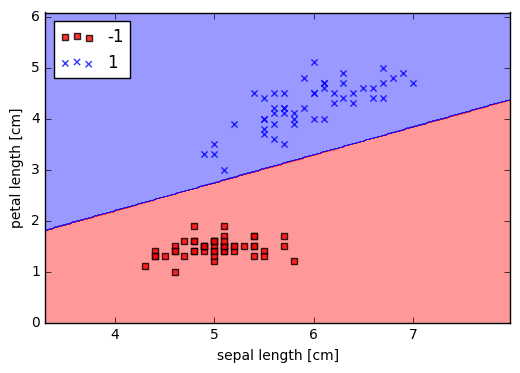

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#### Adaptive linear neurons and the convergence of learning

 ![alt text](adaptive.JPG "Adaptive Perceptron Algorithm")

#### Implementing an Adaptive Linear Neuron

In [16]:
class AdalineGD(object):
    """Adaptive Linear Neuron Classifier
        Parameters
        ================
        eta: float -> Learning rate(between 0.0 and 1.0)
        n_iter: int -> iterations over the training dataset.

        Attributes
        ============
        W : 1-d array (vector) -> Weights after fitting
        errors : list -> Number of misclassifications in every epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ===========
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
            
        y : array-like, shape = {n_samples}
            Target values
            
        Returns
        =========
        self: object
        
        """
        
        self.w = np.zeros(1 + X.shape[1])
        self.cost_= []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w[1:] += self.eta * X.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
            
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w[1:] + self.w[0])
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Plot the cost against the number of epochs for the two different learning rates.**
$$\eta = 0.1, \eta = 0.0001 $$

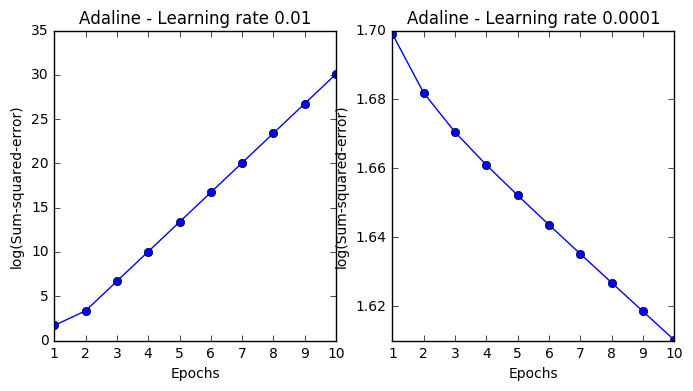

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

we encountered two different types of problems. The left chart shows what could happen if we choose a learning rate that is too large—instead of minimizing the cost function, the error becomeslarger in every epoch because we overshoot the global minimum:
![alt text](gradient.JPG)

#### Feature Scaling for optimal performance
- Gradient descent is one of the many algorithms that benefit from feature scaling.
- Some example of feature scaling include **Standardization**
$$x'_{j} = \frac{x_{j} - \mu_{j}}{\sigma_{j}}$$

$$x'_{j} $$ is a vector consisting of the $$j^{th}$$ feature values 
    

In [21]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

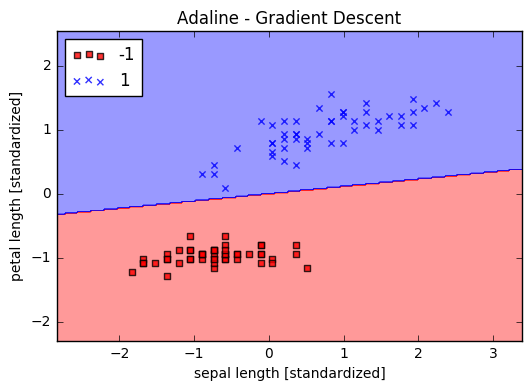

In [24]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

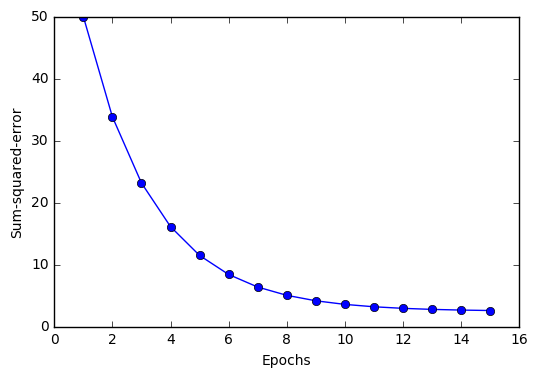

In [25]:

plt.plot(range(1, len(ada.cost_) + 1 ), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

#### Stochastic gradient descent

The **_shuffle** method that we are now using in the AdalineSGD classifier works as follows: via the permutation function in numpy.random, we generate a random sequence of unique numbers in the range 0 to 100. Those numbers can then be used as indices to shuffle our feature matrix and class label vector.

In [26]:
from numpy.random import seed

In [29]:
class AdalineSGD(object):
    """Adaptive Linear Neuron Classifier
        Parameters
        ================
        eta: float -> Learning rate(between 0.0 and 1.0)
        n_iter: int -> iterations over the training dataset.

        Attributes
        ============
        W : 1-d array (vector) -> Weights after fitting
        errors : list -> Number of misclassifications in every epoch
        shuffle : bool (default: True) -> Shuffles training data every epoch if true to prevent cycles
        random_state: int (default: None) -> set random state for shuffling and initializing the weights.
        
    
    """
    
    def __init__(self, eta=0.01, n_iter = 10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ===========
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
            
        y : array-like, shape = {n_samples}
            Target values
            
        Returns
        =========
        self: object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
                
            avg_cost = sum(cost)/ len(y)
            self.cost_.append(avg_cost)
            
        return self
    
        
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
                
        else:
            self._update_weights(X, y)
            
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w = np.zeros(1+m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = target - output
        self.w[1:] += self.eta * xi.dot(error)
        self.w[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
            
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w[1:] + self.w[0])
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

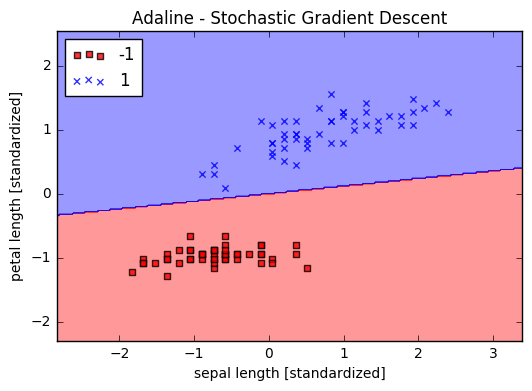

In [30]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

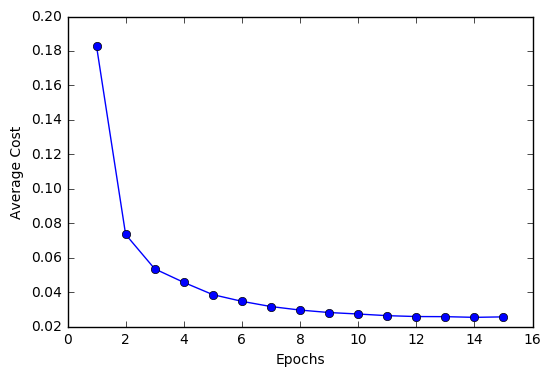

In [31]:
plt.plot(range(1, len(ada.cost_) + 1 ), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()